In [2]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

In [3]:
# Read the data
ames = pd.read_csv("/Users/richlegendary/Desktop/GSB-S544/AmesHousing.csv")

# Get rid of columns with mostly NaN values
good_cols = ames.isna().sum() < 100
ames = ames.loc[:,good_cols]

# Drop other NAs
ames = ames.dropna()

In [4]:
X = ames.drop(["SalePrice", "Order", "PID"], axis = 1)
y = ames["SalePrice"]


ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

lr_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)

In [5]:
cross_val_score(lr_pipeline_1, X, y, cv = 5, scoring = 'r2')

array([-1.00227561e+21, -2.13473460e+19, -4.65481157e+21, -4.24892786e+21,
       -4.16001805e+22])

In [6]:
ridge_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("ridge_regression", Ridge(1))]
)

In [7]:
cross_val_score(ridge_pipeline_1, X, y, cv = 5, scoring = 'r2')

array([0.89815807, 0.91744024, 0.79493606, 0.78522563, 0.91389818])

In [8]:
lr_fitted = lr_pipeline_1.fit(X, y)
ln_cof = lr_fitted.named_steps ['linear_regression'].coef_

In [9]:
ridge_fitted = ridge_pipeline_1.fit(X, y)
rd_cof = ridge_fitted.named_steps ['ridge_regression'].coef_

coef = pd.DataFrame (data = {"Liner_co": ln_cof, "scores": rd_cof})

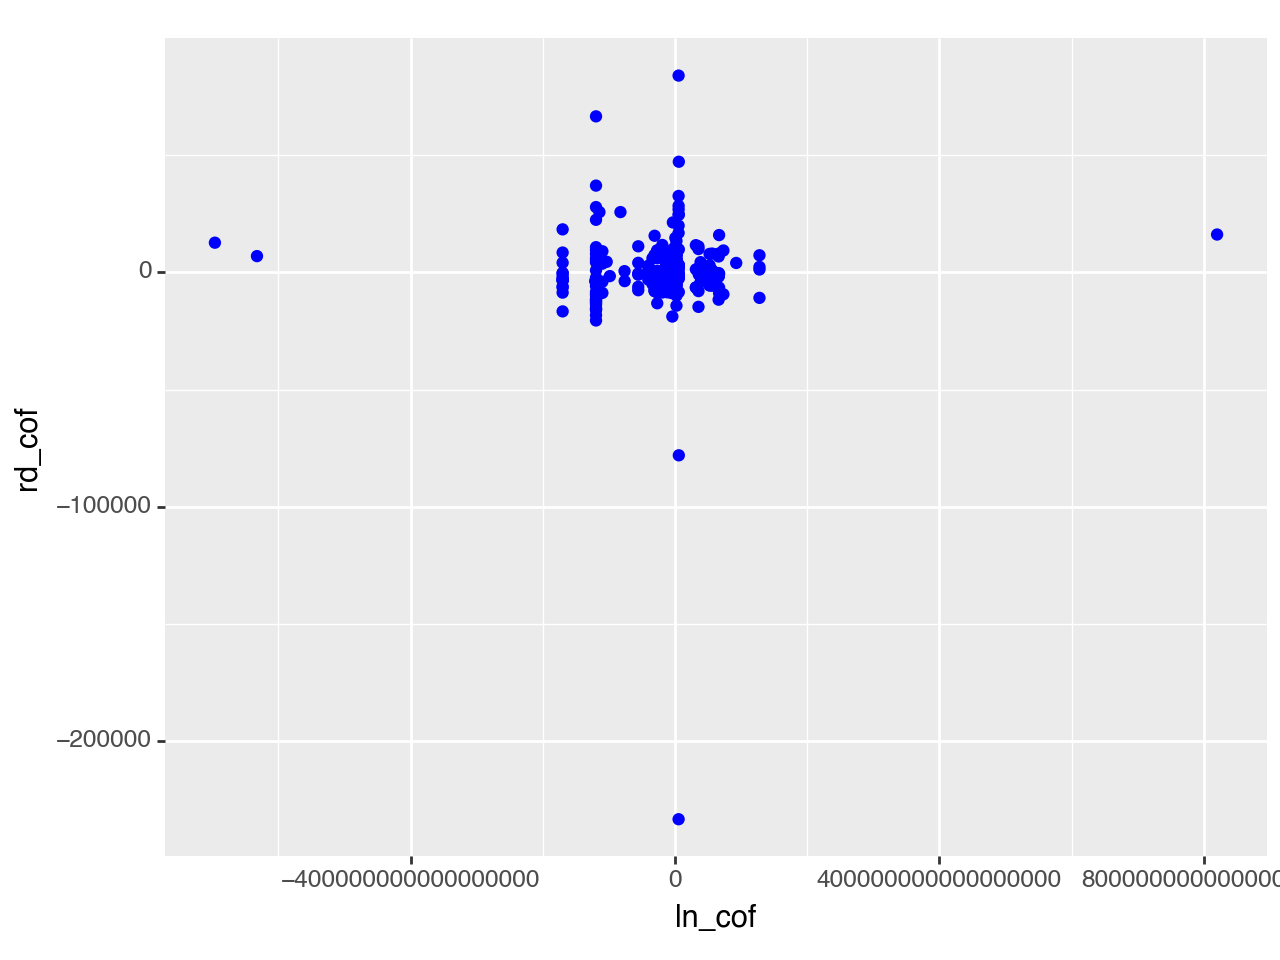

In [10]:
from plotnine import *
coef_plot = ggplot(aes(x='ln_cof', y='rd_cof')) + \
    geom_point(color='blue') 

print(coef_plot)

In [11]:
ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

ridge_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("ridge_regression", Ridge())]
)

degrees = {'ridge_regression__alpha': [0.001, 0.01, 0.1, 1, 10]}

gscv = GridSearchCV(ridge_pipeline_1, degrees, cv = 5, scoring='r2')

In [12]:
gscv_fitted = gscv.fit(X, y)

gscv_fitted.cv_results_

{'mean_fit_time': array([0.02440562, 0.02715497, 0.02552881, 0.020435  , 0.02135067]),
 'std_fit_time': array([0.00362146, 0.01325447, 0.00550222, 0.00061452, 0.00308013]),
 'mean_score_time': array([0.00440793, 0.00706391, 0.00643234, 0.00594015, 0.00812678]),
 'std_score_time': array([0.00035741, 0.00324768, 0.00378801, 0.00170229, 0.00379629]),
 'param_ridge_regression__alpha': masked_array(data=[0.001, 0.01, 0.1, 1, 10],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'ridge_regression__alpha': 0.001},
  {'ridge_regression__alpha': 0.01},
  {'ridge_regression__alpha': 0.1},
  {'ridge_regression__alpha': 1},
  {'ridge_regression__alpha': 10}],
 'split0_test_score': array([0.8972854 , 0.89734306, 0.89774358, 0.89815807, 0.8977621 ]),
 'split1_test_score': array([0.91040618, 0.91061417, 0.91230557, 0.91744024, 0.92081211]),
 'split2_test_score': array([0.78901601, 0.7891259 , 0.79010977, 0.79493606, 0.80057243]),

In [13]:
gscv_fitted.cv_results_['mean_test_score']
pd.DataFrame(data = {'ridge_regression__alpha': [0.001, 0.01, 0.1, 1, 10], "scores": gscv_fitted.cv_results_['mean_test_score']})

,ridge_regression__alpha,scores
0,0.001,0.853920
1,0.010,0.854186
2,0.100,0.856302
3,1.000,0.861932
4,10.000,0.864272


In [14]:
lasso_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("lasso_regression", Lasso())]
)

degrees = {'lasso_regression__alpha': [0.001, 0.01, 0.1, 1, 10]}

gscv = GridSearchCV(lasso_pipeline_1, degrees, cv = 5, scoring='r2')

In [15]:
gscv_fitted = gscv.fit(X, y)

gscv_fitted.cv_results_
gscv_fitted.cv_results_['mean_test_score']
pd.DataFrame(data = {'Lasso_regression__alpha': [0.001, 0.01, 0.1, 1, 10], "scores": gscv_fitted.cv_results_['mean_test_score']})

/Users/richlegendary/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.109e+11, tolerance: 1.348e+09
/Users/richlegendary/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.466e+11, tolerance: 1.474e+09
/Users/richlegendary/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.894e+11, tolerance: 1.463e+09
/Users/richlegendary/a

,Lasso_regression__alpha,scores
0,0.001,0.855499
1,0.010,0.855606
2,0.100,0.856618
3,1.000,0.857152
4,10.000,0.860632


In [16]:
lasso_fitted = lasso_pipeline_1.fit(X, y)
la_cof = lasso_fitted.named_steps ['lasso_regression'].coef_

coef = pd.DataFrame (data = {"Liner_co": ln_cof, "scores": la_cof})

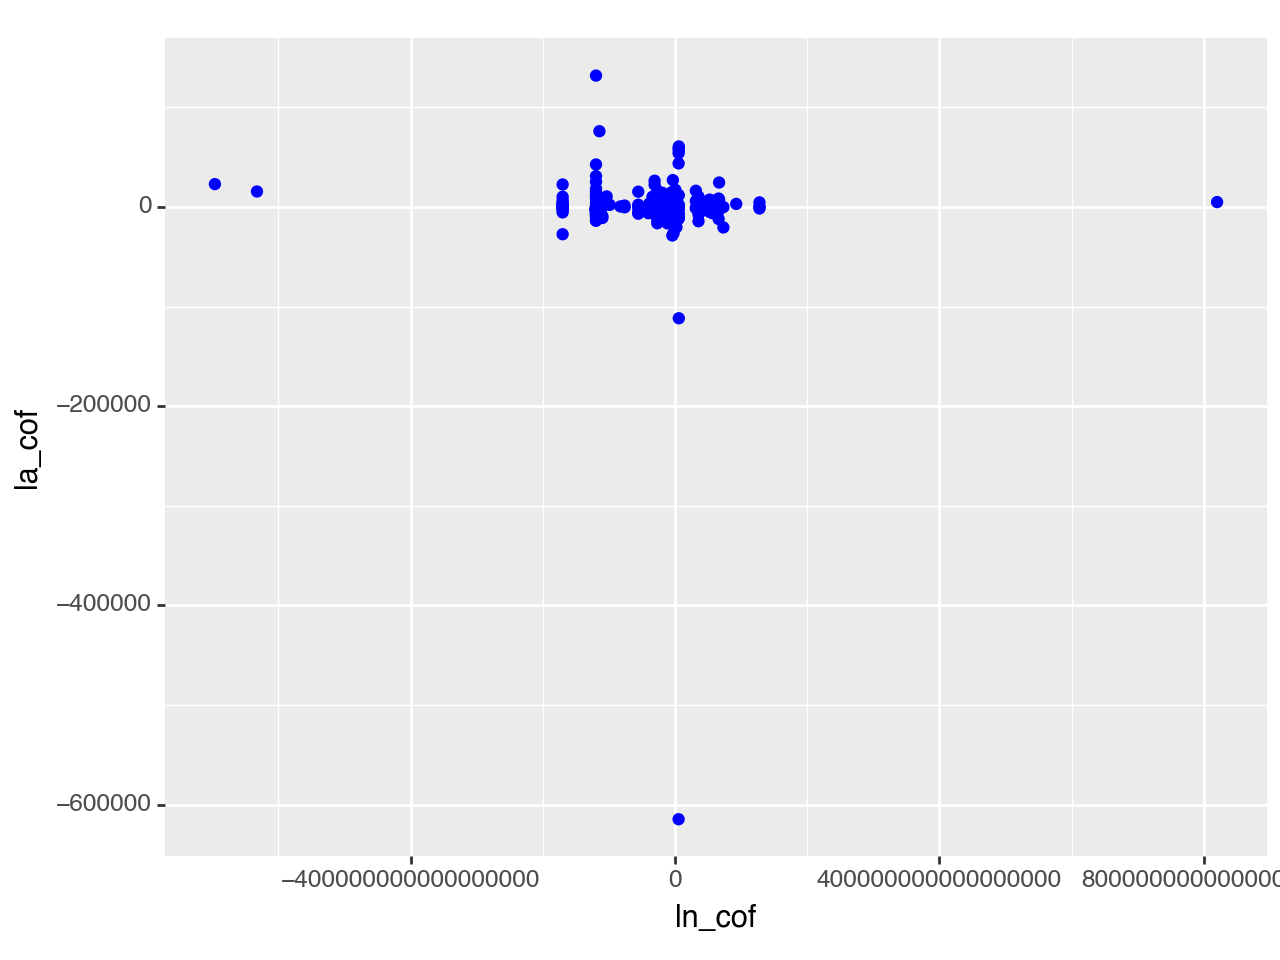

In [17]:
from plotnine import *
coef_plot = ggplot(aes(x='ln_cof', y='la_cof')) + \
    geom_point(color='blue') 


print(coef_plot)

elastic net

In [ ]:
elastic_net_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("elastic_net", ElasticNet(),l1_ratio())]
)

degrees = {'lasso_regression__alpha': [0.001, 0.01, 0.1, 1, 10]}

gscv = GridSearchCV(lasso_pipeline_1, degrees, cv = 5, scoring='r2')

In [22]:
elastic_net_pipeline_1 = Pipeline([
    ("preprocessing", ct),
    ("elastic_net", ElasticNet())
])
degrees = {
    'elastic_net__alpha': [0.001, 0.01, 0.1, 1, 10],
    'elastic_net__l1_ratio': [0.001, 0.01, 0.1, 1, 10]  
}

gscv = GridSearchCV(elastic_net_pipeline_1, degrees, cv=5, scoring='r2')
elastic_fitted = elastic_net_pipeline_1.fit(X, y)
el_cof = elastic_fitted.named_steps ['elastic_net'].coef_

coef = pd.DataFrame (data = {"Liner_co": ln_cof, "Elastic_co": el_cof, "Lasso_co": la_cof,"Ridge_co": rd_cof})

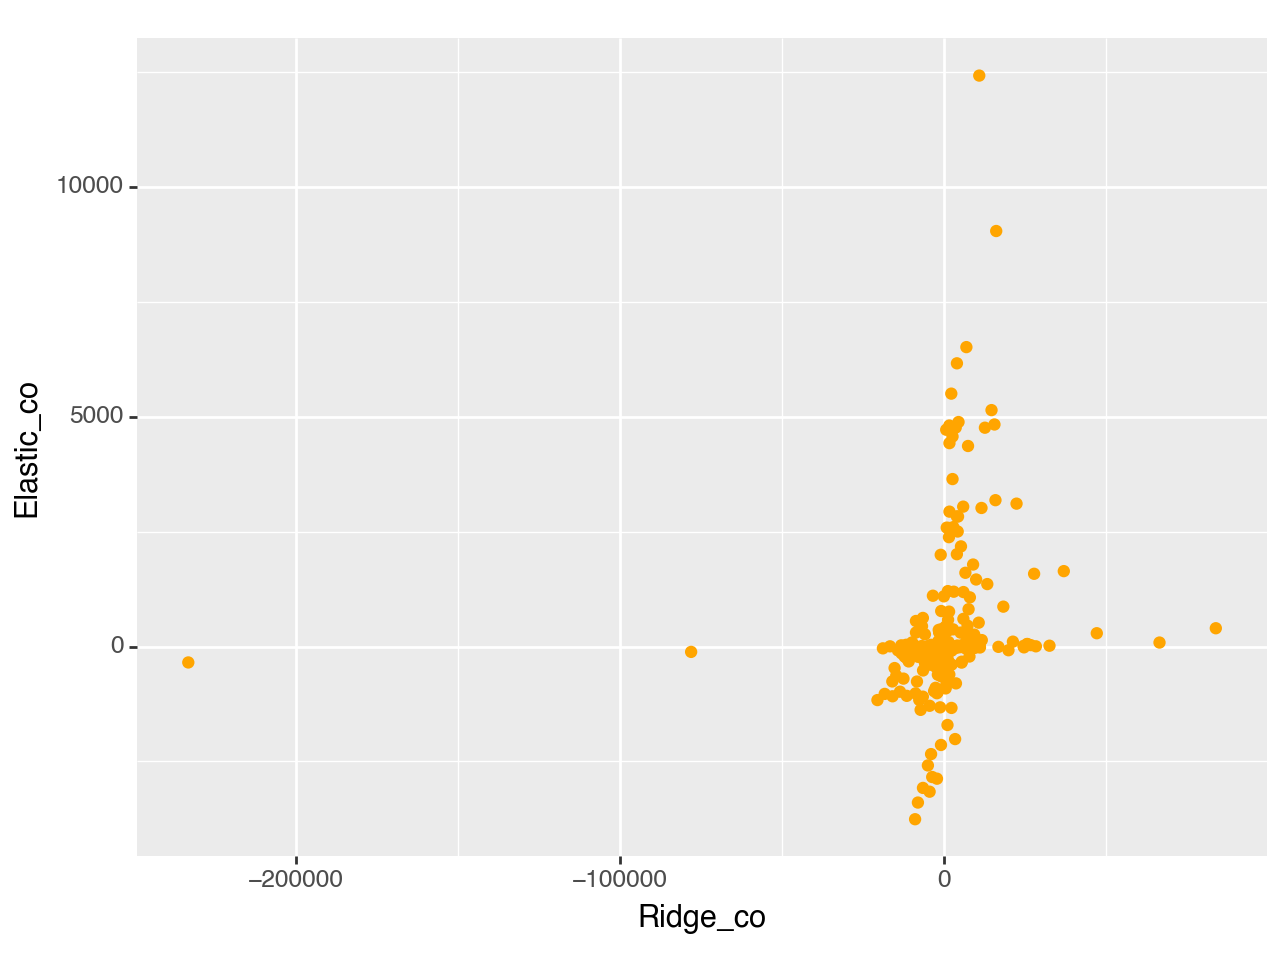

In [29]:
p = (ggplot(coef, aes(x='Ridge_co')) +
     geom_point(aes(y='Elastic_co'), color='orange') )

print(p)



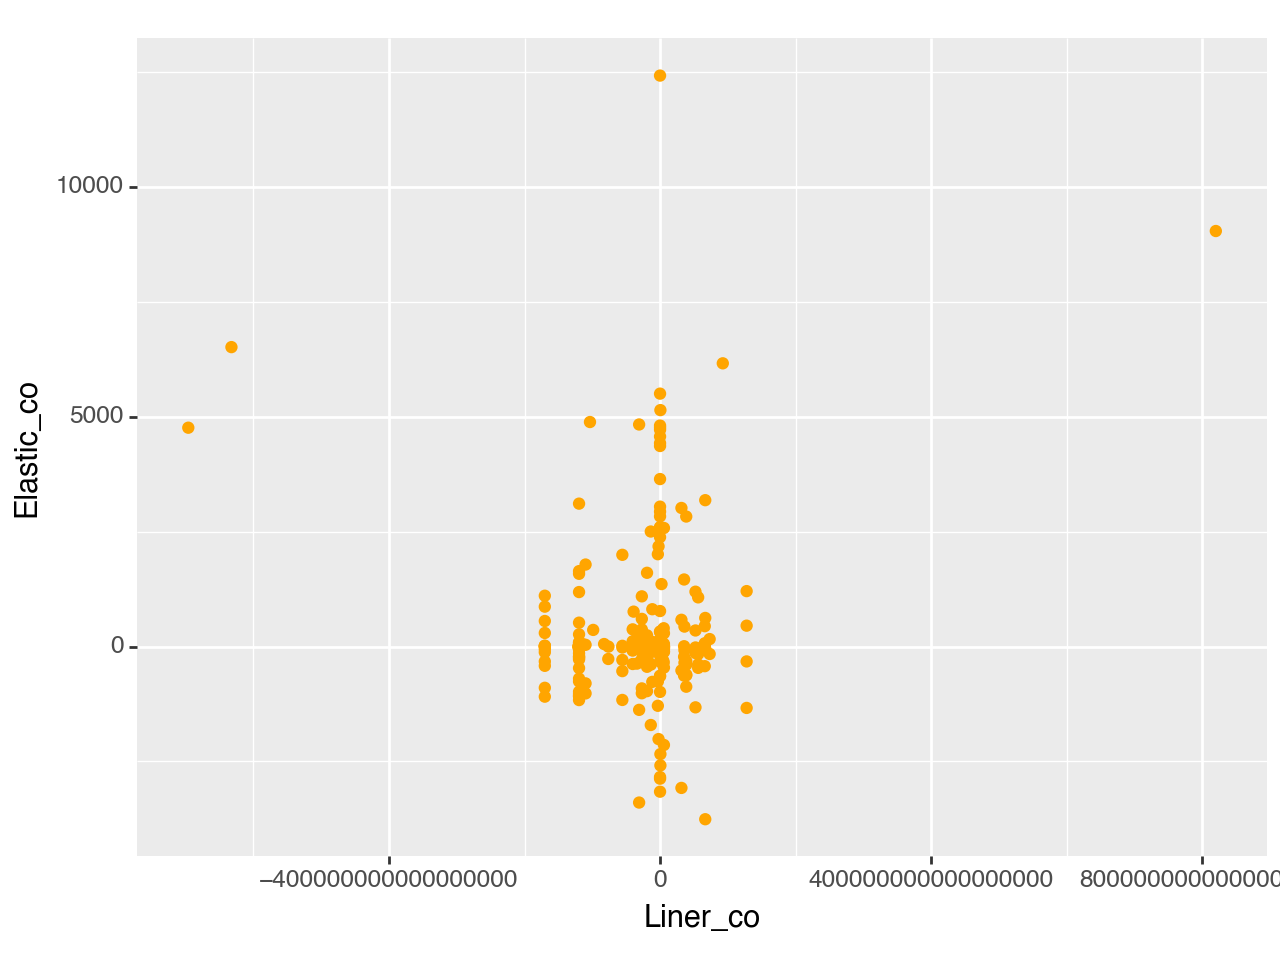

In [31]:
p = (ggplot(coef, aes(x='Liner_co')) +
     geom_point(aes(y='Elastic_co'), color='orange') )

print(p)